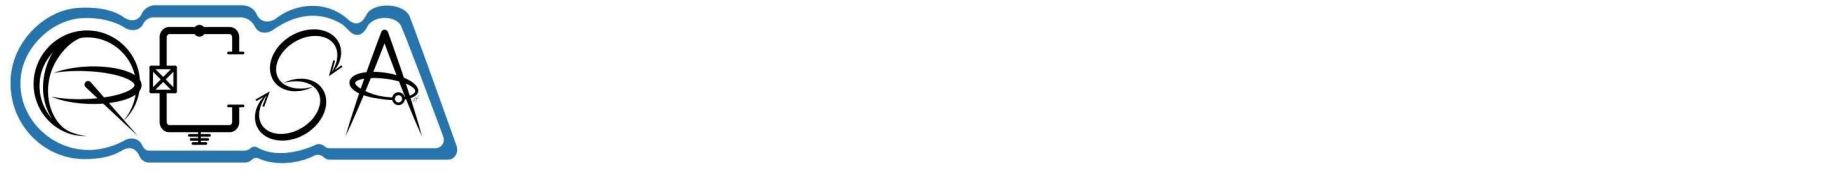

# Intro to Quantum Computing Workshop

This QCSA workshop is intended to be a very basic intro to quantum computing. After watching the presentation, go ahead and run cells in the notebook and play with parameters to get a better feel for some of the content.

To run this notebook, you'll need the qutip, qiskit, numpy, scipy, and matplotlib packages installed as well as a jupyter notebook environment.

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import qiskit
from qiskit import *
from qiskit.providers.aer import Aer

## Qubits
The state of a qubit can be written in terms of two basis states, $|0\rangle$ and $|1\rangle$, with complex amplitudes on each state. You can think of these amplitudes as components of a vector in the direction of your basis vectors, only we're allowed to make them complex. But, since the magnitude squared of these amplitudes represents a probability and probabilities have to add to 1, this vector must have length 1, which removes one parameter we have to work with. Factoring out a number of the form $e
^{i\phi_1}$, known as a global phase, gives the same probabilities and the same behavior, which means we don't care about this number either.

### The Bloch Sphere
So, given two parameters $\theta$ and $\phi$, we can fully define the state of a qubit in terms of our basis states $|0\rangle$ and $|1\rangle$ as $|\psi\rangle=\cos{(\theta/2)}|0\rangle+e^{i\phi}\sin{(\theta/2)}|1\rangle$. This leads to a convenient representation of the state of a qubit as a vector on the Bloch sphere, in spherical coordinates.

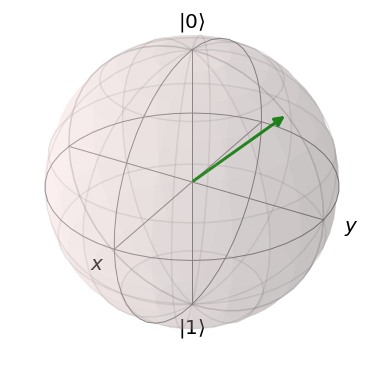

In [2]:
theta = np.pi / 4 # go ahead and change these parameters to see different vectors
phi = np.pi / 2

bloch_state = np.cos(theta / 2) * basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1) # just defining our state
# one thing to know is that python uses j for the unit imaginary

b = Bloch() # defining and drawing the Bloch sphere
b.make_sphere()
b.add_states([bloch_state])
b.show()
b.render()

### Single Qubit Rotations
To change single-qubit states, all we have to do is a rotation on the Bloch sphere around some axis, or a combination of x, y, and z rotations.

In [3]:
state_0 = basis(2, 0) # starting in 0 state

def find_rotation(want_theta, want_phi): # finding the correct rotations to get the desired state
    print('To get this state, we can do a rotation around y of ' + str(round(want_theta * 180 / np.pi, 3))  + ' degrees, then a rotation around z of ' + str(round(want_phi * 180 / np.pi, 3)) + ' degrees.')
    y_rot = (-1j * sigmay() * want_theta / 2).expm() # these are my rotations - don't worry about how these work
    z_rot = (-1j * sigmaz() * want_phi / 2).expm()
    return z_rot * y_rot

To get this state, we can do a rotation around y of 45.0 degrees, then a rotation around z of 90.0 degrees.


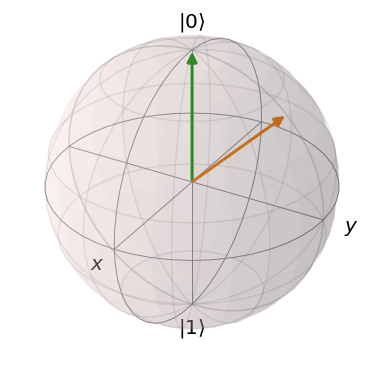

In [4]:
want_theta = np.pi / 4 # put in whatever final state you're looking for, in radians
want_phi = np.pi / 2

rot_matrix = find_rotation(want_theta, want_phi) # finding the correct rotation to do to the state
final_state = rot_matrix * state_0 # doing the rotation

b = Bloch() # defining and drawing the Bloch sphere
b.make_sphere()
b.add_states([state_0, final_state])
b.show()
b.render()

### Measurement
Measuring a single qubit in the qubit basis gives us either $|0\rangle$ or $|1\rangle$ with probability given by the amplitude of that value. Writing down the state as we have, the probability for $|0\rangle$ is $\cos^2{(\theta/2)}$ and the probability for $|1\rangle$ is $\sin^2{(\theta/2)}$.

## Multiple Qubits
### Combining Qubit States
Combining the states of 2 separate, noninteracting qubits can be done with the tensor product $\otimes$. With our notation, this just looks like normal multiplication so $|\psi\rangle=(\alpha_1|0\rangle+\beta_1|1\rangle)\otimes(\alpha_2|0\rangle+\beta_2|1\rangle)=\alpha_1\alpha_2|00\rangle+\alpha_1\beta_2|01\rangle+\beta_1\alpha_2|10\rangle+\beta_1\beta_2|11\rangle$. So, with two qubits we get a four-dimensional basis, with states $|00\rangle,|01\rangle,|10\rangle,|11\rangle$. Each qubit added will double the size of the basis.

In [5]:
alpha1 = 1
beta1 = 1
alpha2 = 1j
beta2 = 2

norm1 = np.sqrt(abs(alpha1)**2 + abs(beta1)**2) # normalizing the states to make sure they both have length 1
norm2 = np.sqrt(abs(alpha2)**2 + abs(beta2)**2)

state1 = 1 / norm1 * (alpha1 * basis(2, 0) + beta1 * basis(2, 1)) # calculating normalized single-qubit states
state2 = 1 / norm2 * (alpha2 * basis(2, 0) + beta2 * basis(2, 1))

print('Qubit 1 is in the state (' + str(np.round(alpha1 / norm1, 3)) + ')|0> + (' + str(np.round(beta1 / norm1, 3)) + ')|1>')
print('Qubit 2 is in the state (' + str(np.round(alpha2 / norm2, 3)) + ')|0> + (' + str(np.round(beta2 / norm2, 3)) + ')|1>')

Qubit 1 is in the state (0.707)|0> + (0.707)|1>
Qubit 2 is in the state (0.447j)|0> + (0.894)|1>


In [6]:
fullstate = tensor(state1, state2) # full 2-qubit state
s_00 = tensor(basis(2, 0), basis(2, 0)) # these are my 2-qubit basis states
s_01 = tensor(basis(2, 0), basis(2, 1))
s_10 = tensor(basis(2, 1), basis(2, 0))
s_11 = tensor(basis(2, 1), basis(2, 1))

coeff_00 = (s_00.dag() * fullstate).tr() # picking out coefficients, don't worry about how this is done - it's basically a dot product
coeff_01 = (s_01.dag() * fullstate).tr()
coeff_10 = (s_10.dag() * fullstate).tr()
coeff_11 = (s_11.dag() * fullstate).tr()

print('The 2-qubit state is (' + str(np.round(coeff_00, 3)) + ')|00> + (' + str(np.round(coeff_01, 3)) + ')|01> + (' + str(np.round(coeff_10, 3)) + ')|10> + (' + str(np.round(coeff_11, 3)) + ')|11>.')

The 2-qubit state is (0.316j)|00> + (0.632)|01> + (0.316j)|10> + (0.632)|11>.


### Entanglement
A general 2-qubit state is just a combination of the 4 basis states with some complex amplitudes, again with length 1. If we let 2 qubits interact with each other or with their environment in a certain way, sometimes they will become entangled. All this means is that we can't factor them into the tensor product of single-qubit states, which also means we can't draw them on the Bloch sphere.

In [7]:
def is_entangled(state): # checks if a 2-qubit state is entangled - don't worry about how this works
    rho1 = state.ptrace(0)
    val = (rho1**2).tr()
    if (val == 1):
        return False
    return True

Put in parameters for your general state in the cell below, and the code will normalize it and check if if is an entangled state. Try evaluating the tensor product of 2 single-qubit states to find a state that isn't entangled, then change one of the coefficients to change it into an entangled state.

In [8]:
a = 1 # go ahead an change these coefficients up to make different entangled or not entangled states
b = 1
c = 1
d = .5

gen_2qubit = (a * s_00 + b * s_01 + c * s_10 + d * s_11).unit() # .unit() is another way to make the length equal to 1
ent = is_entangled(gen_2qubit)

coeff_00 = (s_00.dag() * gen_2qubit).tr() # picking out the normalized coefficients, like before
coeff_01 = (s_01.dag() * gen_2qubit).tr()
coeff_10 = (s_10.dag() * gen_2qubit).tr()
coeff_11 = (s_11.dag() * gen_2qubit).tr()

print('The general state is (' + str(np.round(coeff_00, 3)) + ')|00> + (' + str(np.round(coeff_01, 3)) + ')|01> + (' + str(np.round(coeff_10, 3)) + ')|10> + (' + str(np.round(coeff_11, 3)) + ')|11>')

if (ent):
    print('This state is entangled.')
else:
    print('This state is not entangled.')

The general state is (0.555)|00> + (0.555)|01> + (0.555)|10> + (0.277)|11>
This state is entangled.


Measuring entangled states also works similarly - if we measure both qubits, we will end up with one of the four basis states, with probability given by the amplitude of that state. If we measure only one qubit, we will end up with a single-qubit state that depends on the original state and the measured value of the first qubit.

As an example, measuring the first qubit of the state $\frac{1}{2}(|00\rangle+|01\rangle+|10\rangle-|11\rangle)$ will give us two possibilities:

1) The first qubit in $|0\rangle$ and the second qubit in state $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

2) The first qubit in $|1\rangle$ and the second qubit in state $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

In this case, these two outcomes have equal probability. Note that the state of the second qubit depends on the value measured for the first qubit - this is what entanglement means. Run the next cell to see the result of measuring the first qubit of your state from above.

In [9]:
norm_0 = np.sqrt(abs(a)**2 + abs(b)**2)
norm_1 = np.sqrt(abs(c)**2 + abs(d)**2)
norm = np.sqrt(norm_0**2 + norm_1**2)

print('If we measure qubit 1 and get |0>, qubit 2 is in the state (' + str(np.round(a / norm_0, 3)) + ')|0> + (' + str(np.round(b / norm_0, 3)) + ')|1>.')
print('The probability of this happening is ' + str(round(norm_0**2 / norm**2, 2)) + '.')
print('If we measure qubit 1 and get |1>, qubit 2 is in the state (' + str(np.round(c / norm_1, 3)) + ')|0> + (' + str(np.round(d / norm_1, 3)) + ')|1>.')
print('The probability of this happening is ' + str(round(norm_1**2 / norm**2, 2)) + '.')

If we measure qubit 1 and get |0>, qubit 2 is in the state (0.707)|0> + (0.707)|1>.
The probability of this happening is 0.62.
If we measure qubit 1 and get |1>, qubit 2 is in the state (0.894)|0> + (0.447)|1>.
The probability of this happening is 0.38.


## Challenges
Hardware challenges in quantum computing involve errors and decoherence as well as scaling.

### Decoherence
Often, decoherence is talked about using coherence times $T_1$ and $T_2$. Your $T_1$ or relaxation time represents the time before a qubit prepared in the $|1\rangle$ state decays to the $|0\rangle$ state.

I'm going to assume the only cause of relaxation is just some random, probabilistic process causing your qubit to flip from 1 to 0. Obviously there are other causes as well, but it should be reasonably easy to see why this type of decoherence causes an exponential decay, on average. Feel free to mess with the number of shots and with the probabilities.

In [10]:
time = np.linspace(0, 100, 1000)
import random

def flip_loc_array(n, p): # determines when/if the bit flip happens for each shot
    loc = np.ones(n) * 1000
    for i in range(n):
        for j in range(1000):
            if random.randint(0, 1000) / 1000 <= p / 10:
                loc[i] = j
                break
    return loc

def average_result(n, loc): # computes average probability for 1, this is absolutely not the best way to do it
    tot = np.zeros(1000)
    for i in range(n):
        num = int(loc[i])
        for j in range(num):
            tot[j] = tot[j] + 1
    return tot / n

Text(0.5, 0, 'Time')

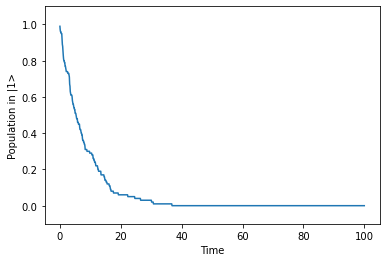

In [11]:
n = 100 # number of shots for averaging
p = .1 # probability of flipping, per unit time

flip_array = flip_loc_array(n, p)
sim = average_result(n, flip_array)

plt.plot(time, sim)
plt.ylim([-.1, 1.1])

plt.ylabel('Population in |1>')
plt.xlabel('Time')

$T_2$ or dephasing time is usually caused by fluctuations in qubit splitting, which changes how the states evolve in time. In general, states rotate around the z axis as time passes with a speed proportional to the energy splitting of the qubit. Usually, we don't care about this because a simple change of variables can remove the time dependence, but if we don't precisely know the time dependence this doesn't work.

I'm going to simulate the result of preparing the state $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$ and waiting enough time for the ideal qubit to complete one rotation. I'm also going to add some gaussian noise which will cause the final state to have some slight error. Go ahead and change the amount of noise by changing the standard deviation. I've found that keeping the number of states around 10 is a good way to visualize it, otherwise the sphere gets cluttered.

In [12]:
initial_state = (basis(2, 0) + basis(2, 1)) / np.sqrt(2)

def find_final_states(sdev, num):
    states = [basis(2, 0)] * num
    for i in range(num):
        delta = random.gauss(0, sdev)
        rot = (-1j * (2 * np.pi + delta) * sigmaz() / 2).expm()
        states[i] = rot * initial_state
    return states

In [13]:
num = 10 # number of noisy states to evaluate
sdev = .1 # standard deviation of noise, basically how bad your noise is

final_states = find_final_states(sdev, num)

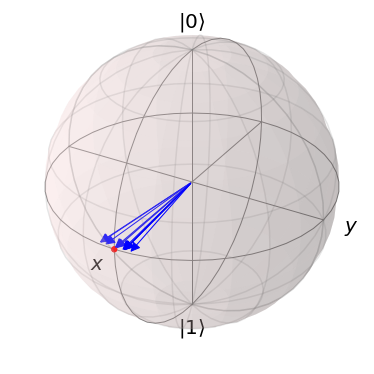

In [14]:
b = Bloch() # defining and drawing the Bloch sphere
b.make_sphere()
b.point_color = 'r'
b.add_points([1, 0, 0]) # plotting the endpoint for the ideal operation, with no noise, in red
b.vector_width = 1
b.vector_color = 'b'
b.add_states(final_states) # the result of our noisy rotation
b.show()
b.render()

Over longer timescales or numbers of operations, this can lead to the behavior of a collection of qubits looking more and more classically probabilistic, as you lose precise phase knowledge and control.

### Other Challenges
I'm not going to cover fidelity, scaling, or error correction in this notebook. But, in general, as operations or qubit number increase, errors increase and error correction becomes even more important and difficult.

## Quantum Circuits
Quantum circuits are depicted with a horizontal line for each qubit, with a box or symbol on top to denote a gates, or operations on those qubits. Circuits are read from left to right.

### Single Qubit Gates
Single qubit gates are essentially just rotations on the Bloch sphere, like shown above. These include X, Y, and Z rotations as well as X, Y, and Z gates, which are just rotations around the corresponding axis by 180 degrees.

In [15]:
qc = QuantumCircuit(1) # This is what an X gate looks like on a diagram of a quantum circuit with a single qubit
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

In [16]:
phi = np.pi / 4 # the input of the y rotation

qc = QuantumCircuit(1) # This is what a Y rotation gate looks like on a diagram of a quantum circuit with a single qubit
qc.ry(phi, 0)
qc.draw()

┌─────────┐
q: ┤ Ry(π/4) ├
   └─────────┘

Another commonly mentioned gate is the P gate or phase gate, which is essentially a Z rotation by some value phi. The I gate represents the identity, and the S gate is just a P gate with angle $\pi/2$, or a 90 degree rotation.

The Hadamard gate is a Y rotation of 90 degrees, then an X gate.

Finally, all single-qubit gates can be written as a single rotation, or a single U gate with different parameters.

In [17]:
theta = np.pi / 4 # inputs for our U gate
phi = 0
lambda0 = 0

qc = QuantumCircuit(1) 
qc.u(theta, phi, lambda0, 0)
qc.draw()

┌────────────┐
q: ┤ U(π/4,0,0) ├
   └────────────┘

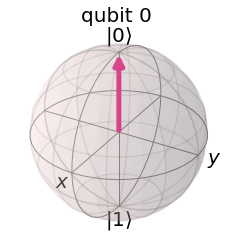

In [18]:
qc = QuantumCircuit(1) 

# add gates below this line to create your own circuits and see what they do to the qubit
# note that qubits are initialized in state |0> at the beginning of each circuit

qc.draw()

qc.save_statevector() # get the result and plot it on the Bloch sphere
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
qiskit.visualization.plot_bloch_multivector(state)

It's also useful to know that gates can be written in matrix form, just like qubit states can be written in vector form. If the qubit state is $\alpha|0\rangle+\beta|1\rangle$, the matrix form is

$\begin{pmatrix}\alpha\\ \beta\end{pmatrix}$

For example, the matrix form of an X gate, which takes $|0\rangle$ to $|1\rangle$ and vice versa, is

$\begin{pmatrix}0&1\\1&0\end{pmatrix}$

Packages for quantum programming will typically allow you to print out the matrix for any built in gates, so that you can see what they do to your basis states.

### Multi Qubit Gates

One of the most important gates that acts on multiple qubits is the CNOT or CX gate. This performs an X rotation if the first, control, qubit is in the state $|1\rangle$ and does nothing otherwise.

In [19]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

We can do a controlled version of any single qubit gate, and it is also possible to add multiple control qubits. A CNOT with 2 control qubits is called a CCNOT or Toffoli gate. Qiskit has many of these built in, but as it turns out, one 2-qubit entangling gate is all we need since all others can be written as a combination of single qubit rotations and the CNOT gate.